[-1, 4, -2, 7]

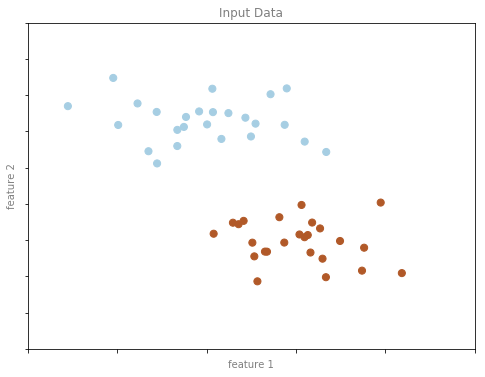

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
import numpy as np

def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')
    
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

clf = SVC(kernel='linear')
clf.fit(X, y)

X2, _ = make_blobs(n_samples=80, centers=2,
                  random_state=0, cluster_std=0.80)

X2 = X2[50:]

y2 = clf.predict(X2)


fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:,1], c=y, **point_style)

format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])


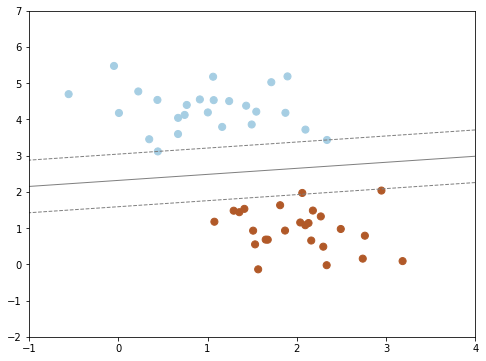

In [ ]:
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

             
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray',linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)